In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv1D,MaxPooling1D,Flatten,LSTM,SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall

In [2]:
bank_df = pd.read_csv('UniversalBank.csv')

## Exploratory Data Analysis

In [28]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [3]:
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [4]:
bank_df.shape

(5000, 14)

In [5]:
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

## Data Visualization

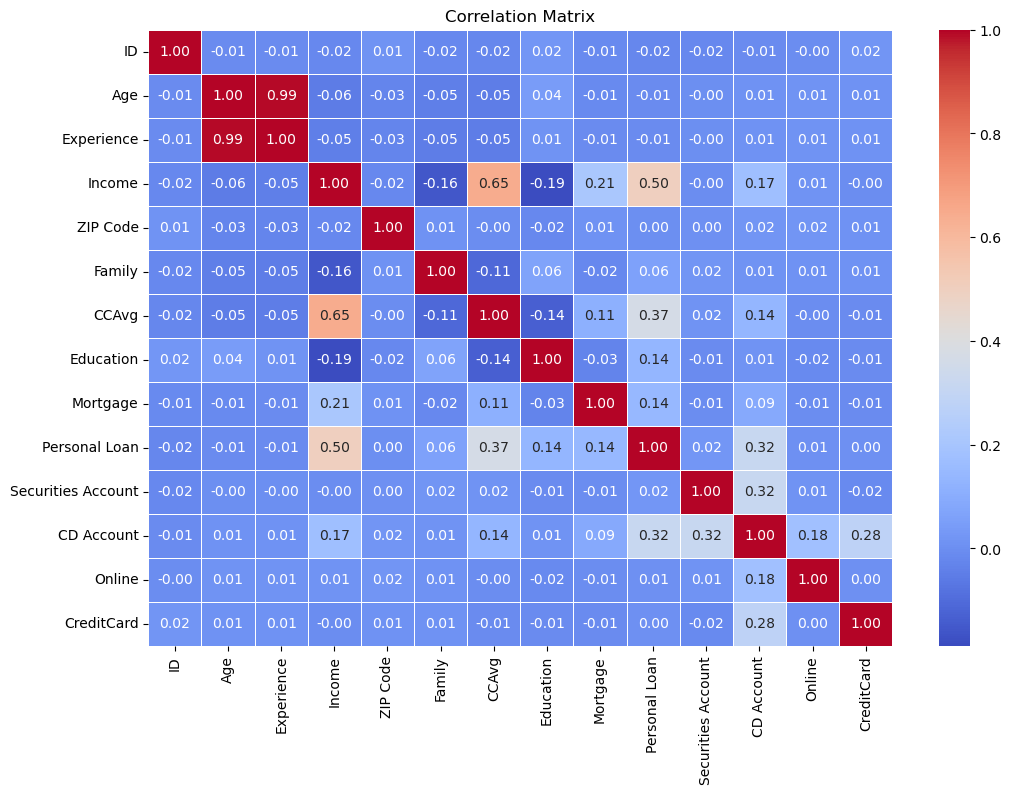

In [6]:
correlation_matrix = bank_df.corr()

plt.figure(figsize=(12, 8))
plt.title('Correlation Matrix')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


## Data Preparation

In [7]:
X = bank_df.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
y = bank_df['Personal Loan']

In [8]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [9]:
print("X Train Shape :",X_train.shape)
print("X Test Shape :",X_test.shape)
print("y Train Shape :",y_train.shape)
print("y Test Shape :",y_test.shape)

X Train Shape : (4000, 11)
X Test Shape : (1000, 11)
y Train Shape : (4000,)
y Test Shape : (1000,)


## Multilayer Perceptron Model

In [10]:
mlp_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train MLP Model
mlp_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])

# Evaluate MLP Model
y_pred_mlp = mlp_model.predict(X_test)
y_pred_mlp = (y_pred_mlp > 0.5).astype(int)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print("MLP Model Accuracy:", accuracy_mlp)




Epoch 1/50


100/100 [==============================] - 2s 7ms/step - loss: 2.2199 - accuracy: 0.8203 - val_loss: 0.6853 - val_accuracy: 0.8913
Epoch 2/50
100/100 [==============================] - 0s 4ms/step - loss: 1.0241 - accuracy: 0.8522 - val_loss: 0.4678 - val_accuracy: 0.8737
Epoch 3/50
100/100 [==============================] - 0s 4ms/step - loss: 0.7130 - accuracy: 0.8659 - val_loss: 0.4613 - val_accuracy: 0.8612
Epoch 4/50
100/100 [==============================] - 0s 4ms/step - loss: 0.6388 - accuracy: 0.8603 - val_loss: 0.3654 - val_accuracy: 0.8963
Epoch 5/50
100/100 [==============================] - 0s 4ms/step - loss: 0.5536 - accuracy: 0.8653 - val_loss: 0.4783 - val_accuracy: 0.8288
Epoch 6/50
100/100 [==============================] - 0s 4ms/step - loss: 0.4349 - accuracy: 0.8728 - val_loss: 0.3338 - val_accuracy: 0.8813
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8809 - val_loss: 0.2887 - val_accuracy: 0.8637
Ep

In [11]:
print("MLP Model Confusion Matrix:")
print(conf_matrix_mlp)

MLP Model Confusion Matrix:
[[895   0]
 [ 99   6]]


In [12]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       895
           1       1.00      0.06      0.11       105

    accuracy                           0.90      1000
   macro avg       0.95      0.53      0.53      1000
weighted avg       0.91      0.90      0.86      1000



In [13]:
evaluation_result_mlp = mlp_model.evaluate(X_test, y_test)
print("Evaluation results",evaluation_result_mlp)

32/32 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9010
Evaluation results [0.19016382098197937, 0.9010000228881836]


In [14]:
loss_mlp = evaluation_result_mlp[0]
accuracy_mlp = evaluation_result_mlp[1]
print('Test Loss:', loss_mlp)
print('Test Accuracy:', accuracy_mlp)

Test Loss: 0.19016382098197937
Test Accuracy: 0.9010000228881836


## Convolutional Neural Network Model

In [15]:
#reshaping input data for CNN
X_train_cnn = np.expand_dims(X_train,axis = 2)
X_test_cnn = np.expand_dims(X_test,axis = 2)

In [16]:
#cnn model architecture implementation
model= Sequential()
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (X_train_cnn.shape[1],1)))
model.add(MaxPooling1D(pool_size = 2))
model.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation = 'sigmoid'))


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 9, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 4, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 32)             6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [18]:
METRICS = ['accuracy', Precision(name='precision'), Recall(name='recall')]
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)

training = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])


Epoch 1/50
125/125 [==============================] - 2s 9ms/step - loss: 0.4951 - accuracy: 0.8708 - precision: 0.2568 - recall: 0.2000 - val_loss: 0.3090 - val_accuracy: 0.8630 - val_precision: 0.3095 - val_recall: 0.2476
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 0.2849 - accuracy: 0.8898 - precision: 0.3429 - recall: 0.1920 - val_loss: 0.2338 - val_accuracy: 0.8980 - val_precision: 0.5652 - val_recall: 0.1238
Epoch 3/50
125/125 [==============================] - 1s 6ms/step - loss: 0.2576 - accuracy: 0.8980 - precision: 0.3907 - recall: 0.1573 - val_loss: 0.2253 - val_accuracy: 0.8920 - val_precision: 0.3636 - val_recall: 0.0381
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.2270 - accuracy: 0.8992 - precision: 0.4125 - recall: 0.1760 - val_loss: 0.2144 - val_accuracy: 0.8950 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/50
125/125 [==============================] - 1s 6ms/step - loss: 0.2175 - accuracy: 0.9

In [19]:
evaluation_result_cnn = model.evaluate(X_test, y_test)
print("Evaluation results of CNN",evaluation_result_cnn)

32/32 [==============================] - 0s 4ms/step - loss: 0.1641 - accuracy: 0.9440 - precision: 0.9804 - recall: 0.4762
Evaluation results of CNN [0.16413523256778717, 0.9440000057220459, 0.9803921580314636, 0.4761904776096344]


In [20]:
loss_cnn = evaluation_result_cnn[0]
accuracy_cnn = evaluation_result_cnn[1]
print('Test Loss:', loss_cnn)
print('Test Accuracy:', accuracy_cnn)

Test Loss: 0.16413523256778717
Test Accuracy: 0.9440000057220459


## Long Short Term Memory model

In [21]:
#LSTM architecture
X_train_array = X_train.to_numpy()

# Reshape X_train_array to have the appropriate shape
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
model_lstm = Sequential()
model_lstm.add(LSTM(units= 64,input_shape = (X_train_reshaped.shape[1],X_train_reshaped.shape[2])))
model_lstm.add(Dense(units = 32, activation = 'relu'))
model_lstm.add(Dense(units = 1, activation = 'sigmoid'))
    
model_lstm.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics=['accuracy'])
               
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19009 (74.25 KB)
Trainable params: 19009 (74.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_lstm.fit(X_train,y_train , epochs = 50, batch_size = 32)

Epoch 1/50
125/125 [==============================] - 3s 6ms/step - loss: 0.3208 - accuracy: 0.9062
Epoch 2/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1943 - accuracy: 0.9118
Epoch 3/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1710 - accuracy: 0.9247
Epoch 4/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1595 - accuracy: 0.9350
Epoch 5/50
125/125 [==============================] - 1s 7ms/step - loss: 0.1465 - accuracy: 0.9388
Epoch 6/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1547 - accuracy: 0.9345
Epoch 7/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1389 - accuracy: 0.9430
Epoch 8/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1371 - accuracy: 0.9467
Epoch 9/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1279 - accuracy: 0.9510
Epoch 10/50
125/125 [==============================] - 1s 6ms/step - loss: 0.1218 - accuracy: 0.9507

In [23]:
evaluation_lstm = model_lstm.evaluate(X_test,y_test)
print("evaluation: ",evaluation_lstm)
loss_lstm = evaluation_lstm[0]
accuracy_lstm = evaluation_lstm[1]
print('Test Loss:', loss_lstm)
print('Test Accuracy:', accuracy_lstm)

32/32 [==============================] - 1s 5ms/step - loss: 0.0459 - accuracy: 0.9850
evaluation:  [0.04589395225048065, 0.9850000143051147]
Test Loss: 0.04589395225048065
Test Accuracy: 0.9850000143051147


## Recurrent Neural Network

In [24]:
#RNN Model Architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units = 64,input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_rnn.add(Dense(units = 32, activation = 'relu')) 
model_rnn.add(Dense(units = 1, activation = 'sigmoid'))
            

model_rnn.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics= ['accuracy'])
model_rnn.fit  (X_train, y_train, epochs = 50,batch_size = 32, validation_data= (X_test,y_test)) 
    


Epoch 1/50
125/125 [==============================] - 2s 8ms/step - loss: 0.2856 - accuracy: 0.9005 - val_loss: 0.2120 - val_accuracy: 0.9220
Epoch 2/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1869 - accuracy: 0.9305 - val_loss: 0.1346 - val_accuracy: 0.9480
Epoch 3/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1432 - accuracy: 0.9460 - val_loss: 0.1451 - val_accuracy: 0.9410
Epoch 4/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1379 - accuracy: 0.9425 - val_loss: 0.1025 - val_accuracy: 0.9570
Epoch 5/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1217 - accuracy: 0.9570 - val_loss: 0.0977 - val_accuracy: 0.9650
Epoch 6/50
125/125 [==============================] - 1s 5ms/step - loss: 0.1045 - accuracy: 0.9617 - val_loss: 0.0876 - val_accuracy: 0.9650
Epoch 7/50
125/125 [==============================] - 1s 5ms/step - loss: 0.0884 - accuracy: 0.9707 - val_loss: 0.0627 - val_accuracy: 0.9760
Epoch 

In [25]:
evaluation_rnn = model_rnn.evaluate(X_test,y_test)

print("evaluation: ",evaluation_lstm)
loss_rnn = evaluation_rnn[0]
accuracy_rnn = evaluation_rnn[1]
print('Test Loss:', loss_rnn)
print('Test Accuracy:', accuracy_rnn)

32/32 [==============================] - 0s 4ms/step - loss: 0.0576 - accuracy: 0.9780
evaluation:  [0.04589395225048065, 0.9850000143051147]
Test Loss: 0.057612624019384384
Test Accuracy: 0.9779999852180481


In [26]:
results = {
    "Model": ["MLP", "CNN", "LSTM", "RNN"],
    "Accuracy": [accuracy_mlp, accuracy_cnn, accuracy_lstm, accuracy_rnn],
    "Loss": [loss_mlp, loss_cnn, loss_lstm, loss_rnn]
}

# Create a DataFrame
results_df = pd.DataFrame(results)
results_df.index += 1
# Display the DataFrame
print(results_df)


  Model  Accuracy      Loss
1   MLP     0.901  0.190164
2   CNN     0.944  0.164135
3  LSTM     0.985  0.045894
4   RNN     0.978  0.057613
